### Project Goal:
* Using a public UCI dataset, apply a variety of classification methods to predict the class (ranked 0-4, 0 being no disease and 1-4 the severity) of heart disease based on 13 patient attributes. 
* By building models that can predict heart disease based on easier to ascertain tests, we can more effectively monitor and intervene in healthcare settings in a both cost effective and distributed manner.


In [37]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [4]:
data = pd.read_csv('heart_data.txt', sep=",", header=None)
data.columns = ["age", "sex", "cp", "trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","rating"]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,rating
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
#Running data quality report
df=data.copy()
columns = list(df.columns.values)
data_types = pd.DataFrame(df.dtypes,columns=['dtype'])
missing_data_counts = pd.DataFrame(df.isnull().sum(),columns=['missing'])
present_data_counts = pd.DataFrame(df.count(),columns=['count'])
unique_value_counts = pd.DataFrame(columns=['unique'])
#for v in list(df.columns.values):
#    unique_value_counts.loc[v] = [df[v].nunique()]
#minimum_values = pd.DataFrame(columns=['min'])
#for v in list(df.columns.values):
#    minimum_values.loc[v] = [df[v].min()]
#maximum_values = pd.DataFrame(columns=['max'])
#for v in list(df.columns.values):
#    maximum_values.loc[v] = [df[v].max()]
data_quality_report = (data_types.join(present_data_counts).join(missing_data_counts).
                       join(unique_value_counts))#.join(minimum_values).
                       #join(maximum_values)

print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report.sort_values(['missing'], ascending=False)


Data Quality Report
Total records: 303


,dtype,count,missing,unique
age,float64,303,0,NaN
sex,float64,303,0,NaN
cp,float64,303,0,NaN
trestbps,float64,303,0,NaN
chol,float64,303,0,NaN
fbs,float64,303,0,NaN
restecg,float64,303,0,NaN
thalach,float64,303,0,NaN
exang,float64,303,0,NaN
oldpeak,float64,303,0,NaN


0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: rating, dtype: float64

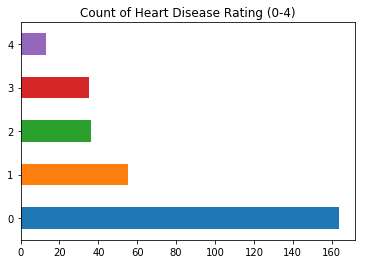

In [6]:
data.rating.value_counts().plot.barh(align='center').set_title('Count of Heart Disease Rating (0-4)')
counts=data.rating.value_counts(normalize=True)
counts
#Over half of the samples do not have heart disease
#Good distribution between disease and non-disease in the dataset

1.0    0.679868
0.0    0.320132
Name: sex, dtype: float64

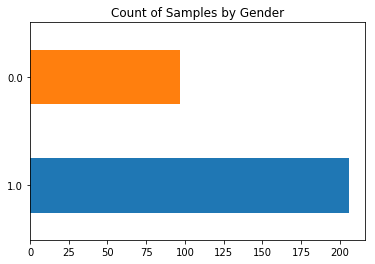

In [7]:
data.sex.value_counts().plot.barh(align='center').set_title('Count of Samples by Gender')
counts=data.sex.value_counts(normalize=True)
counts
#Dataset is 68% male, 32% female

Clear upward trend in resting heart rate with increased age


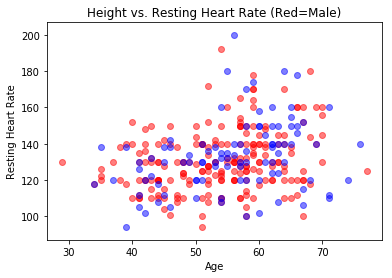

In [8]:
data_male=data[data.sex==1]
data_female=data[data.sex==0]
plt.scatter(data_male.age,data_male.trestbps,c='red',alpha=.5)
plt.scatter(data_female.age,data_female.trestbps,c='blue',alpha=.5)
plt.xlabel("Age")
plt.ylabel("Resting Heart Rate")
plt.title("Height vs. Resting Heart Rate (Red=Male)")
print('Clear upward trend in resting heart rate with increased age')

Text(0.5,1,'Violin Plot of Heart Disease Rating by Chest Pain Type by Gender')

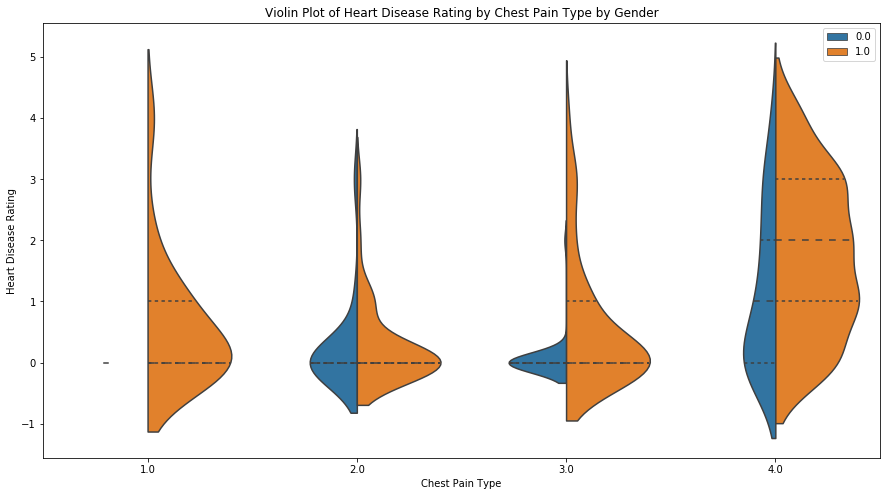

In [9]:
#Looking at the interaction between heart disease and chest pain by gender
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='cp', y='rating', inner='quartile',scale='count', hue='sex', split=True, data=data)
plt.xlabel('Chest Pain Type')
plt.ylabel('Heart Disease Rating')
plt.legend()
plt.title('Violin Plot of Heart Disease Rating by Chest Pain Type by Gender')

#### Interestingly, the 4th type of chest pain (asymptomatic) corresponds with a much wider range of heart disease ratings than any of the other chest pain types, which are mostly not indicative of heart disease being present. 

#### Additionally, the 1st type of chest pain (typical angina), is noticeably not present in any samples of female patients, while it is presented in a good amount of male cases

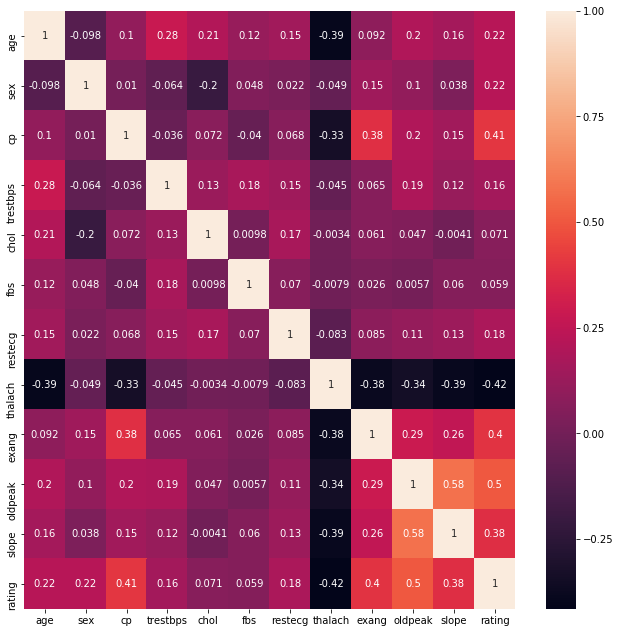

In [10]:
f,ax=plt.subplots(figsize=(11,11))
sns.heatmap(data.corr(),annot=True)
plt.show()

### K-Means
#### Clustering the data into k=5 like the 5 heart disease ratings and seeing results

In [13]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=5)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

#Create dataframe without rating labels 
rating=df.rating
df_unsup=df.drop(['rating'],axis=1)

#Fit pipeline
pipeline.fit(df_unsup)

# Calculate the cluster labels: labels
labels = pipeline.predict(df_unsup)

# Create a DataFrame with labels and species as columns: df
df_kmeans = pd.DataFrame({'labels':labels,'rating':rating})

# Create crosstab: ct
ct = pd.crosstab(df_kmeans['labels'],df_kmeans['rating'])

# Display ct
print(ct)

#Interpreting KMeans help -- pretty bad labeling overall

rating   0   1   2   3   4
labels                    
0       23   3   8   8   1
1       64   7   1   1   0
2       63  23   4   4   0
3        1   0   1   1   1
4        9  21  21  21  11


### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
y = df['rating'].values
X = df_unsup
knn = KNeighborsClassifier(n_neighbors=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=23, stratify=y)
knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))

0.45


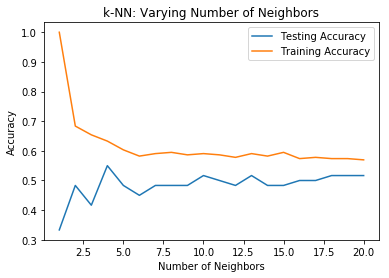

Best performing KNN with 4 Neighbors yields accuracy of 0.55


In [15]:
neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

print('Best performing KNN with 4 Neighbors yields accuracy of ' + str(test_accuracy[3]))

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_pred, y_test))
print('Same accuracy score as the top performing KNN model')

0.55
Same accuracy score as the top performing KNN model


In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score
print('F1 Score: '+str(f1_score(y_test,y_pred, average=None)))
print('Precision Score: '+str(precision_score(y_test,y_pred,average=None)))
print('Recall Score: '+str(recall_score(y_test,y_pred,average=None)))

F1 Score: [0.88571429 0.18181818 0.         0.         0.        ]
Precision Score: [0.81578947 0.18181818 0.         0.         0.        ]
Recall Score: [0.96875    0.18181818 0.         0.         0.        ]


In [20]:
#Tuning the model
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.grid_search import GridSearchCV
clf=LogisticRegression()
parameters={'C':Cs}
logreg_cv=GridSearchCV(clf,parameters,cv=5)
logreg_cv.fit(X,y)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.5925925925925926


### SVM

In [21]:
from sklearn import svm
from sklearn import metrics
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5333333333333333


In [22]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5833333333333334


In [23]:
print('F1 Score: '+str(f1_score(y_test,y_pred, average=None)))
print('Precision Score: '+str(precision_score(y_test,y_pred,average=None)))
print('Recall Score: '+str(recall_score(y_test,y_pred,average=None)))

F1 Score: [0.88235294 0.32       0.14285714 0.         0.        ]
Precision Score: [0.83333333 0.28571429 0.14285714 0.         0.        ]
Recall Score: [0.9375     0.36363636 0.14285714 0.         0.        ]


In [24]:
# Instantiate the GridSearchCV object and run the search
clf=svm.SVC(kernel='linear')
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5]}
searcher = GridSearchCV(clf, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 0.1, 'gamma': 1e-05}
Best CV accuracy 0.5780590717299579


### Decision Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=23)
clf_entropy.fit(X_train,y_train)
y_pred = clf_entropy.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5666666666666667


In [26]:
clf = DecisionTreeClassifier(max_depth=6, random_state=23)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5833333333333334


In [27]:
print('F1 Score: '+str(f1_score(y_test,y_pred, average=None)))
print('Precision Score: '+str(precision_score(y_test,y_pred,average=None)))
print('Recall Score: '+str(recall_score(y_test,y_pred,average=None)))

F1 Score: [0.86956522 0.28571429 0.15384615 0.         0.33333333]
Precision Score: [0.81081081 0.3        0.16666667 0.         0.33333333]
Recall Score: [0.9375     0.27272727 0.14285714 0.         0.33333333]


#### Decision tree using the gini index criterion was more accurate than using entropy as the criterion

### Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50,random_state=23)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6666666666666666


In [29]:
print('F1 Score: '+str(f1_score(y_test,y_pred, average=None)))
print('Precision Score: '+str(precision_score(y_test,y_pred,average=None)))
print('Recall Score: '+str(recall_score(y_test,y_pred,average=None)))

F1 Score: [0.89855072 0.5        0.30769231 0.30769231 0.        ]
Precision Score: [0.83783784 0.55555556 0.33333333 0.33333333 0.        ]
Recall Score: [0.96875    0.45454545 0.28571429 0.28571429 0.        ]


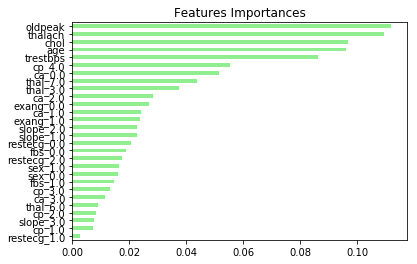

In [30]:
importances = pd.Series(data=clf.feature_importances_, index= X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

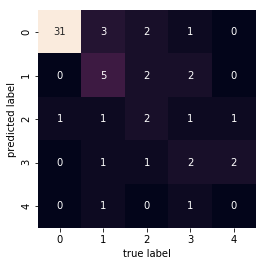

In [31]:
#Looking at performance of model on confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Substantially better performing than any of the previous non-ensemble methods
#### Challenging to discern the true most important factors, as all the dummy variables were deemed as less important than the continuous variables.

### Boosting

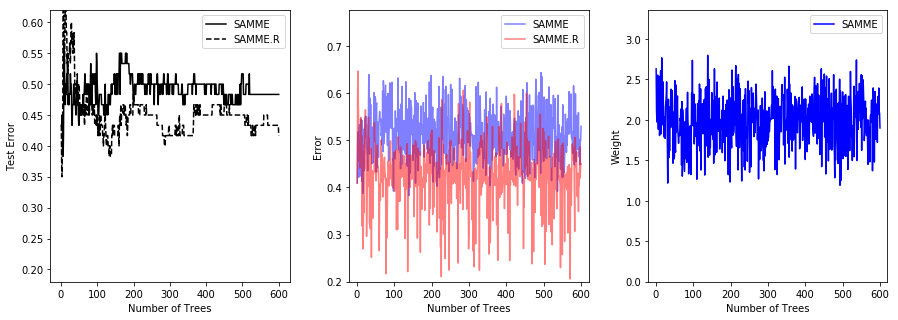

In [32]:
from sklearn.ensemble import AdaBoostClassifier
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

#### Error with Adaboost is higher than the decision tree on it's own. 

## Final Result: Random Forest Provides most accurate modeling
#### Tuning the Random Forest Classifier

In [34]:
from pprint import pprint
clf = RandomForestClassifier(n_estimators=50,random_state=23)
clf.fit(X_train,y_train)
pprint(clf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}


In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4,7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 4, 7, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [36]:
clf_random=RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=2, random_state=23, n_jobs = -1)
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 23.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=1000, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 4, 7, 10], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=23, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [44]:
clf_random.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 800}

In [45]:
clf_random_best=clf_random.best_estimator_
y_pred=clf_random_best.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


In [46]:
print('F1 Score: '+str(f1_score(y_test,y_pred, average=None)))
print('Precision Score: '+str(precision_score(y_test,y_pred,average=None)))
print('Recall Score: '+str(recall_score(y_test,y_pred,average=None)))

F1 Score: [0.85333333 0.11764706 0.         0.26666667 0.        ]
Precision Score: [0.74418605 0.16666667 0.         0.25       0.        ]
Recall Score: [1.         0.09090909 0.         0.28571429 0.        ]


C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Update randomsearch with values closer to default. Then run gridsearch once narrow down the range

In [47]:
#Going from RandomizedSearchCV to GridSearchCV in area of best params
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [False, True],
    'max_depth': [50,60,70, None],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [5, 7, 9],
    'n_estimators': [700,800,900]
}
clf_grid=GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
clf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [False, True], 'max_depth': [50, 60, 70, None], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [5, 7, 9], 'n_estimators': [700, 800, 900]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [48]:
clf_grid.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 800}

In [49]:
clf_best_grid=clf_grid.best_estimator_
y_pred=clf_best_grid.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


In [50]:
print('F1 Score: '+str(f1_score(y_test,y_pred, average=None)))
print('Precision Score: '+str(precision_score(y_test,y_pred,average=None)))
print('Recall Score: '+str(recall_score(y_test,y_pred,average=None)))



F1 Score: [0.85333333 0.11764706 0.         0.26666667 0.        ]
Precision Score: [0.74418605 0.16666667 0.         0.25       0.        ]
Recall Score: [1.         0.09090909 0.         0.28571429 0.        ]


C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### With the poor predictive power to differentiate between the heart disease classes in the multiclass model (1-4), want to test the model against a binary class: Heart Disease (1) or No Heart Disease (0)

### Binary Random Forest Classification

In [51]:
#Making the data binary
y_train_binary=y_train>0
y_test_binary=y_test>0

In [52]:
clf = RandomForestClassifier(n_estimators=50,random_state=23)
clf.fit(X_train,y_train_binary)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4,7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 4, 7, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [55]:
clf_random_binary=RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=23, n_jobs = -1)
clf_random_binary.fit(X_train, y_train_binary)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 4, 7, 10], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=23, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [56]:
clf_random_binary.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 600}

In [57]:
clf_random_binary_best=clf_random_binary.best_estimator_
y_pred=clf_random_binary_best.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_binary, y_pred))

Accuracy: 0.8666666666666667


In [58]:
param_grid = {
    'bootstrap': [False, True],
    'max_depth': [10,20,30, None],
    'max_features': ['auto'],
    'min_samples_leaf': [5,6,7],
    'min_samples_split': [9,10,11],
    'n_estimators': [500,600,700]
}
clf_grid_binary=GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
clf_grid_binary.fit(X_train,y_train_binary)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  2.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [False, True], 'max_depth': [10, 20, 30, None], 'max_features': ['auto'], 'min_samples_leaf': [5, 6, 7], 'min_samples_split': [9, 10, 11], 'n_estimators': [500, 600, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [59]:
clf_grid_binary.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 9,
 'n_estimators': 600}

In [60]:
clf_grid_binary_best=clf_grid_binary.best_estimator_
y_pred=clf_grid_binary_best.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_binary, y_pred))

Accuracy: 0.8666666666666667


In [61]:
print('F1 Score: '+str(f1_score(y_test_binary,y_pred)))
print('Precision Score: '+str(precision_score(y_test_binary,y_pred)))
print('Recall Score: '+str(recall_score(y_test_binary,y_pred)))

F1 Score: 0.8518518518518519
Precision Score: 0.8846153846153846
Recall Score: 0.8214285714285714


#### Clearly predictive ability when switching to a binary classifier is greatly improved (accuracy improved by 50%). In practice, this could allow the algorithm to effectively screen for patients that need to be checked by a doctor because they are suspected for heart disease, from where the doctor can rate the severity. 